In [1]:
import os
import re
import sys
import numpy as np
import pandas as pd
from matplotlib.pyplot import *
from ml.tfidf import TFIDFModel
%matplotlib inline

### Clean up the data to remove duplicates, nulls and noise (wikipedia redirects)

In [2]:
#If new records have been added, run this routine to clean up and remove dups
#fauna = pd.read_csv('./ml/datasets/fauna.csv.gz', compression='gzip')
#print('fauna.shape before nulls removed', fauna.shape)
#fauna = fauna[fauna['class'].notnull()]
#fauna = fauna[fauna['text'].notnull()]
#fauna = fauna[fauna['order'].notnull()]
#print('fauna.shape after nulls removed', fauna.shape)
#print('fauna.shape before duplicates removed', fauna.shape)
#fauna = fauna.drop_duplicates(['page-id'], keep='first')
#print('fauna.shape after duplicates removed', fauna.shape)
#fauna = fauna.drop(fauna[fauna['text'].str.contains('This is a redirect')].index)
#print('fauna.shape after redirects dropped', fauna.shape)
#print(fauna.shape)
#fauna.to_csv('./ml/datasets/fauna-{}.csv.gz'.format(fauna.shape[0]), compression='gzip', index=False)

### Load the fauna data

In [2]:
fauna = pd.read_csv('./ml/datasets/fauna-53699.csv.gz', compression='gzip')

In [3]:
print(fauna.shape)
fauna.tail()

(53699, 10)


class          family           genus   kingdom        order  \
53694  insecta   pterophoridae     stenoptilia  animalia  lepidoptera   
53695  insecta  gracillariidae  phyllonorycter  animalia  lepidoptera   
53696  insecta        erebidae           amata  animalia  lepidoptera   
53697  insecta       arctiidae       eudoliche  animalia  lepidoptera   
53698  insecta       carabidae       cicindela  animalia   coleoptera   

        page-id      phylum    species  \
53694  29053519  arthropoda   ssuprema   
53695  29262763  arthropoda    ppumila   
53696  41956436  arthropoda   asimplex   
53697  41264649  arthropoda     emajor   
53698  33121648  arthropoda  cdorsalis   

                                                    text  \
53694  Stenoptilia suprema is a moth of the Pterophor...   
53695  Phyllonorycter pumila is a moth of the Gracill...   
53696  Amata simplex is a moth of the family Erebidae...   
53697  Eudoliche major is a moth of the Arctiidae fam...   
53698  Cicindela dorsalis (common name eastern beach ...   

                       title  
53694    Stenoptilia suprema  
53695  Phyllonorycter pumila  
53696          Amata simplex  
53697        Eudoliche major  
53698     Cicindela dorsalis

### Visualize the number of records in each class

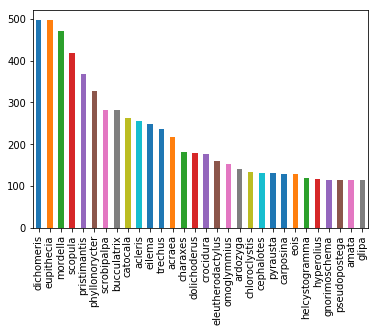

In [7]:
classes = fauna['genus'].value_counts()
classes[0:30].plot(kind="bar")


### Basic filtering on various fields

In [10]:
fauna[fauna['title']=='Red panda']

class     family               genus   kingdom      order  page-id  \
1317  mammalia  ailuridae  ailurusfcuvier1825  animalia  carnivora    26441   

        phylum   species                                               text  \
1317  chordata  afulgens  The red panda (Ailurus fulgens), also called t...   

          title  
1317  Red panda

### Comparing similar and disimilar species

In [11]:
bears = fauna[fauna['family'] == 'ursidae']
bears.head()

class   family                        genus   kingdom      order  \
187   mammalia  ursidae   ailuropodamilneedwards1870  animalia  carnivora   
190   mammalia  ursidae                          NaN  animalia  carnivora   
250   mammalia  ursidae  kretzoiarctosabellaetal2012  animalia  carnivora   
407   mammalia  ursidae            melursusmeyer1793  animalia  carnivora   
1332  mammalia  ursidae                        ursus  animalia  carnivora   

       page-id    phylum                             species  \
187     339548  chordata                                 NaN   
190    5478888  chordata                                 NaN   
250   46316720  chordata  kretzoiarctosbeatrixabellaetal2011   
407     399740  chordata                            mursinus   
1332     51054  chordata                         uamericanus   

                                                   text                  title  
187   Ailuropoda is the only extant genus in the urs...             Ailuropoda  
190   Ailuropodinae is a subfamily of Ursidae that c...          Ailuropodinae  
250   Kretzoiarctos beatrix is an extinct bear from ...  Kretzoiarctos beatrix  
407   The sloth bear (Melursus ursinus), also known ...             Sloth bear  
1332  The American black bear (Ursus americanus) is ...    American black bear

In [12]:
sharks = fauna[fauna['family'] == 'lamnidae']
sharks.head()

class    family                  genus   kingdom        order  \
134   chondrichthyes  lamnidae  carcharodonasmith1838  animalia  lamniformes   
2144  chondrichthyes  lamnidae                 isurus  animalia  lamniformes   
3881  chondrichthyes  lamnidae        lamnacuvier1816  animalia  lamniformes   
4420  chondrichthyes  lamnidae                 isurus  animalia  lamniformes   
5269  chondrichthyes  lamnidae                 isurus  animalia  lamniformes   

       page-id    phylum      species  \
134      43619  chordata  ccarcharias   
2144    766132  chordata  ioxyrinchus   
3881   8874336  chordata          NaN   
4420   5640856  chordata      ipaucus   
5269  47090510  chordata      iplanus   

                                                   text                title  
134   The great white shark (Carcharodon carcharias)...    Great white shark  
2144  The shortfin mako shark (Isurus oxyrinchus), a...  Shortfin mako shark  
3881  Lamna is a genus of mackerel sharks in the fam...                Lamna  
4420  The longfin mako shark (Isurus paucus) is a sp...   Longfin mako shark  
5269  Isurus planus, also known as the hook-tooth ma...        Isurus planus

In [13]:
beetles = fauna[fauna['order'] == 'coleoptera']
beetles.head()

class                       family                   genus   kingdom  \
799   insecta                tenebrionidae  eleodeseschscholtz1829  animalia   
1139  insecta                          NaN                     NaN  animalia   
1572  insecta       carabidaelatreille1802                     NaN  animalia   
1579  insecta  lutrochidaekasapcrowson1975   lutrochuserichson1847  animalia   
1611  insecta     geotrupidaelatreille1802                     NaN  animalia   

           order   page-id      phylum species  \
799   coleoptera  17247312  arthropoda     NaN   
1139  coleoptera    339399  arthropoda     NaN   
1572  coleoptera    417048  arthropoda     NaN   
1579  coleoptera    855394  arthropoda     NaN   
1611  coleoptera   2139411  arthropoda     NaN   

                                                   text            title  
799   Pinacate beetles, also known as stink beetles,...  Pinacate beetle  
1139  A weevil is a type of beetle from the Curculio...           Weevil  
1572  Ground beetles are a large, cosmopolitan famil...    Ground beetle  
1579  Lutrochidae is a family of water beetles somet...      Lutrochidae  
1611  Geotrupidae (from Greek geos, earth, and trype...      Geotrupidae

### Create a TFIDF Table

In [34]:
tfidf = TFIDFModel()
tfidf.create(fauna, 'text', False)

### Plot the term count over iterations

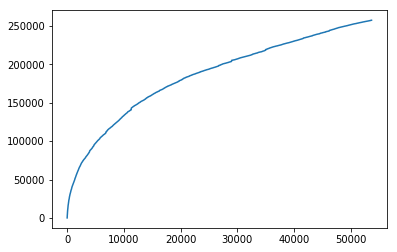

In [35]:
term_count_series = pd.Series(tfidf.term_count_over_iterations)
term_count_series.plot()

### Top words for Asian black bear

In [36]:
abb_idx = fauna[fauna['title']=='Asian black bear'].index[0]
print(tfidf.get_sorted_terms_for_document(abb_idx).head(10))

bears      935.153232
bear       477.230763
black      358.722127
asian      203.989765
to          97.702188
will        87.553667
and         86.767496
have        73.744217
asiatic     68.923862
ursus       67.802758
dtype: float64


### Top words for Sun bear

In [46]:
sb_idx = fauna[fauna['title']=='Sun bear'].index[0]
print(tfidf.get_sorted_terms_for_document(sb_idx).head(10))

sun          166.979828
bear         154.658118
bears         76.065095
bile          46.278575
malayanus     38.565479
helarctos     36.397561
honey         32.770824
malayan       29.783379
claws         28.559337
and           27.421803
dtype: float64


### Computer the Euclidean distance between the Asian black bear and the Sun bear

In [38]:
asian_black_bear = tfidf[abb_idx].toarray()
sun_bear = tfidf[sb_idx].toarray()
np.linalg.norm(asian_black_bear - sun_bear)

1508.2254624161658

### Top words for Flatfish

In [39]:
ff_idx = fauna[fauna['title'] == 'Flatfish'].index[0]
print(tfidf.get_sorted_terms_for_document(ff_idx).head(10))

flatfishes        88.637299
flatfish          66.603545
side              36.024783
families          32.303946
soleidae          26.435124
pleuronectidae    26.086807
fish              25.086177
bottom            24.446483
head              21.450694
hybrids           20.087411
dtype: float64


### Top words for Hagfish

In [40]:
hf_idx = fauna[fauna['title'] == 'Hagfish'].index[0]
print(tfidf.get_sorted_terms_for_document(hf_idx).head(10))

hagfish        418.457121
slime          107.983342
lampreys        58.283402
myxine          57.029132
vertebrates     49.696129
craniata        40.792010
duct            40.681655
gill            34.023251
to              33.796354
knot            31.386509
dtype: float64


In [41]:
# Euclidian distance between the Flatfish and the Hagfish
flatfish = tfidf[ff_idx].toarray()
hagfish = tfidf[hf_idx].toarray()
np.linalg.norm(hagfish - flatfish)

527.25822577444637

In [45]:
# Euclidian distance between the Sub bear and the Hagfish
np.linalg.norm(sun_bear - hagfish)

1644.0281381873442